In [1]:
# for this test we will be using thr VADER model 
# this model looks at each word and adds them together to find a score 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk


In [17]:

# Correct function to read an Excel file
df = pd.read_csv(r'C:\Users\eyas1\Downloads\James Harden Data.csv')

In [18]:
df.head()

,Id,Player @,Content,Date
0,1,@JHarden13,Fuck a @JHarden13 We have this guy. #Brotherly...,30-Dec-23
1,2,@JHarden13,Never give up and shhh the critics @JHarden13 ...,30-Dec-23
2,3,@JHarden13,dance with THE BEARD\n\n@JHarden13 | @LAClippers,30-Dec-23
3,4,@JHarden13,"James Harden is the best PG, playmaker and bal...",30-Dec-23
4,5,@JHarden13,MJ shot with his left? @JHarden13 ? \nWTF @vin...,30-Dec-23


In [4]:
# we will be running sentimant analysis on the Content row 
# we are going to use an example of one comment to start 

example = df['Content'] [3]
print(example)

James Harden is the best PG, playmaker and ball handler in the world @JHarden13


In [5]:
# now its VADER time

nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eyas1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#testing the intensity analyzer 
# all this is doing is summing up how many negative and positive words there are in this sentance 
#the compound score is from negative 1 to positive 1 to show how positive it is 

sia.polarity_scores("today is going to be awesome")

{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

In [44]:
sia.polarity_scores("james harden is a killer on the court")

{'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6486}

In [7]:
sia.polarity_scores("I hate it here")

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [8]:
print(example)

sia.polarity_scores(example)

James Harden is the best PG, playmaker and ball handler in the world @JHarden13


{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize an empty dictionary to store results
res = {}

# Function to calculate sentiment scores and store in res
def get_sentiment(text, idx):
    sentiment_scores = sia.polarity_scores(text)
    res[idx] = sentiment_scores
    return sentiment_scores

# Apply the function to the 'Content' column
tqdm.pandas()
df['sentiment'] = df['Content'].progress_apply(lambda text: get_sentiment(text, df.index[df['Content'] == text][0]))



100%|██████████| 20/20 [00:00<00:00, 4561.51it/s]


In [14]:
res

{np.int64(0): {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423},
 np.int64(1): {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296},
 np.int64(2): {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 np.int64(3): {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369},
 np.int64(4): {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.7247},
 np.int64(5): {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 np.int64(6): {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 np.int64(7): {'neg': 0.145, 'neu': 0.784, 'pos': 0.071, 'compound': -0.4404},
 np.int64(8): {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.9938},
 np.int64(9): {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34},
 np.int64(10): {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6369},
 np.int64(11): {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.5707},
 np.int64(12): {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 np.int64(13): {'neg': 0.0, 'neu': 

In [15]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.368,0.632,0.000,-0.5423
1,0.216,0.784,0.000,-0.2960
2,0.000,1.000,0.000,0.0000
3,0.000,0.756,0.244,0.6369
4,0.420,0.580,0.000,-0.7247
5,0.000,1.000,0.000,0.0000
6,0.000,1.000,0.000,0.0000
7,0.145,0.784,0.071,-0.4404
8,0.000,0.473,0.527,0.9938
9,0.286,0.714,0.000,-0.3400


In [23]:
vaders = pd.DataFrame(res).T

vaders = vaders.reset_index().rename(columns={'index': 'Id'})

vaders = vaders.merge(df, how = 'left')

In [25]:

# now we have sentiment score 

vaders.head(20)


,Id,neg,neu,pos,compound,Player @,Content,Date
0,0,0.368,0.632,0.000,-0.5423,NaN,NaN,NaN
1,1,0.216,0.784,0.000,-0.2960,@JHarden13,Fuck a @JHarden13 We have this guy. #Brotherly...,30-Dec-23
2,2,0.000,1.000,0.000,0.0000,@JHarden13,Never give up and shhh the critics @JHarden13 ...,30-Dec-23
3,3,0.000,0.756,0.244,0.6369,@JHarden13,dance with THE BEARD\n\n@JHarden13 | @LAClippers,30-Dec-23
4,4,0.420,0.580,0.000,-0.7247,@JHarden13,"James Harden is the best PG, playmaker and bal...",30-Dec-23
5,5,0.000,1.000,0.000,0.0000,@JHarden13,MJ shot with his left? @JHarden13 ? \nWTF @vin...,30-Dec-23
6,6,0.000,1.000,0.000,0.0000,@JHarden13,Imagine having @JHarden13 on your team.,30-Dec-23
7,7,0.145,0.784,0.071,-0.4404,@JHarden13,PG to @JHarden13 in the 2H tonight,29-Dec-23
8,8,0.000,0.473,0.527,0.9938,@LAClippers,Watching Clippers game and realize all the nig...,29-Dec-23
9,9,0.286,0.714,0.000,-0.3400,@JHarden13,Dear @JHarden13. you may not ever see this but...,29-Dec-23


In [26]:
# Group by the 'Date' column and calculate the mean of 'compound'
average_compound_by_date = vaders.groupby('Date')['compound'].mean()

# If you want the result as a DataFrame instead of a Series, reset the index
average_compound_by_date = average_compound_by_date.reset_index()

# Rename the columns for clarity
average_compound_by_date.columns = ['Date', 'Average Compound']

# Display the result
print(average_compound_by_date)


        Date  Average Compound
0  28-Dec-23          0.000000
1  29-Dec-23          0.210917
2  30-Dec-23         -0.063967


<Axes: xlabel='Date', ylabel='Average Compound'>

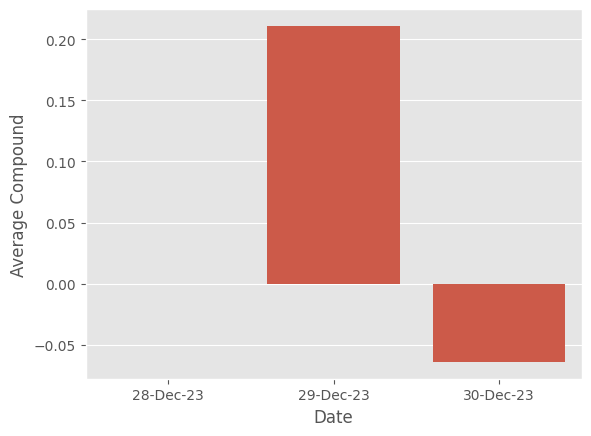

In [30]:
sns.barplot(data= average_compound_by_date, x = 'Date', y = 'Average Compound')

<Axes: xlabel='Date', ylabel='Average Compound'>

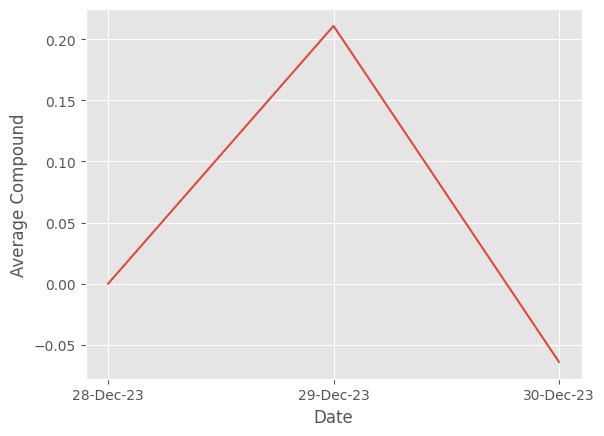

In [31]:
sns.lineplot(data= average_compound_by_date, x = 'Date', y = 'Average Compound')

In [32]:
#lets try the Roberta Pretrained model 

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax 

In [41]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


AttributeError: module 'torch' has no attribute '__version__'